### Python for Math and Stat: Homework #10 by Ethan Schacht

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#Reading the file

dfmovie = pd.read_csv("imdb-movie.csv")

dfmovie.rename(columns={'Runtime (Minutes)': 'Runtime_min', 'Revenue (Millions)': 'Revenue_mil'}, inplace=True)
dfmovie

,Title,Genre,Description,Director,Actors,Year,Runtime_min,Rating,Votes,Revenue_mil,Metascore
0,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0
1,Avatar,"Action,Adventure,Fantasy",A paraplegic marine dispatched to the moon Pan...,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2009,162,7.8,935408,760.51,83.0
2,Jurassic World,"Action,Adventure,Sci-Fi","A new theme park, built on the original site o...",Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...",2015,124,7.0,455169,652.18,59.0
3,The Avengers,"Action,Sci-Fi",Earth's mightiest heroes must come together an...,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.1,1045588,623.28,69.0
4,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
5,Rogue One,"Action,Adventure,Sci-Fi",The Rebel Alliance makes a risky move to steal...,Gareth Edwards,"Felicity Jones, Diego Luna, Alan Tudyk, Donnie...",2016,133,7.9,323118,532.17,65.0
6,Finding Dory,"Animation,Adventure,Comedy","The friendly but forgetful blue tang fish, Dor...",Andrew Stanton,"Ellen DeGeneres, Albert Brooks,Ed O'Neill, Kai...",2016,97,7.4,157026,486.29,77.0
7,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",When Tony Stark and Bruce Banner try to jump-s...,Joss Whedon,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",2015,141,7.4,516895,458.99,66.0
8,The Dark Knight Rises,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,78.0
9,The Hunger Games: Catching Fire,"Action,Adventure,Mystery",Katniss Everdeen and Peeta Mellark become targ...,Francis Lawrence,"Jennifer Lawrence, Josh Hutcherson, Liam Hemsw...",2013,146,7.6,525646,424.65,76.0


Problem 1: Returns a list of the movies with descriptions that contain a given word.

In [5]:
def description_word(word, dfmovie):
    return list(dfmovie[dfmovie["Description"].str.contains(word)]["Title"])

description_word("Earth's", dfmovie)

['The Avengers', 'Avengers: Age of Ultron', 'Oblivion']

Problem 2.1: Returns a list of the movies that a director has made.

In [14]:
def director_movies(name, dfmovie):
    return list(dfmovie[dfmovie["Director"] == name]["Title"])
    

In [15]:
director_movies("J.J. Abrams", dfmovie)

['Star Wars: Episode VII - The Force Awakens',
 'Star Trek',
 'Star Trek Into Darkness',
 'Mission: Impossible III',
 'Super 8']

Problem 2.2: Returns a tuple with the name of the director as the first element and the number of movies as the second element.

In [62]:
def director_movies_most(dfmovie):
    top_dir = dfmovie.groupby("Director").count().sort_values(by = "Title", ascending = False).iloc[0]
    return top_dir.name, top_dir["Title"]
    
director_movies_most(dfmovie)

('David Yates', 5)

In [10]:
a,b = 3, 4
lst = a,b
list(lst)

[3, 4]

Problem 2.3:  Returns a tuple with the name of the director as the first element and the average revenue as the second element.

In [67]:
def director_revenue_most(dfmovie):
    top_rev = dfmovie.groupby("Director").mean().sort_values(by = "Revenue_mil", ascending = False).iloc[0]
    return top_rev.name, top_rev["Revenue_mil"]
director_revenue_most(dfmovie)

('James Cameron', 760.51)

Problem 2.4: Bar chart showing the top 10 revenue-generating directors with the director names on the horizontal axis and the average revenue on the vertical axis.

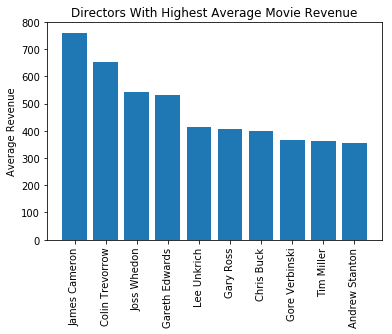

In [66]:
top_rev = dfmovie.groupby("Director").mean().sort_values(by = "Revenue_mil", ascending = False).iloc[0:10]
x_vals = top_rev.index.values
y_vals = top_rev["Revenue_mil"]

plt.bar(x_vals, y_vals)
plt.xticks(rotation = 90)
plt.ylabel("Average Revenue")
plt.title("Directors With Highest Average Movie Revenue")
plt.show()

Problem 3.1: This function returns a list of the movies that an actor or actress has appeared in.

In [97]:
def actor_movies(name, dfmovie):
    return list(dfmovie[dfmovie["Actors"].str.contains(name)]["Title"])

actor_movies("Tom Hanks", dfmovie)

['Toy Story 3',
 'Sully',
 'Captain Phillips',
 'Saving Mr. Banks',
 'Bridge of Spies',
 'Cloud Atlas']

Problem 3.2: This function determines which actor / actress has appeared in the most movies and returns a returns a tuple with the name of the actor as the first element and the number of movies as the second element.

In [88]:
def actor_movies_most(dfmovie):
    actors = list(dfmovie["Actors"])
    split_actors = []
    for i in actors:
        split_actors.append(i.split(","))
    flat_actors = np.array(split_actors).flatten()
    actors2 = {"Actor": flat_actors, "count": 1}
    actors2 = pd.DataFrame(actors2)
    freq_actors = actors2.groupby("Actor").count().sort_values("count", ascending = False).iloc[0]
    return freq_actors.name, freq_actors["count"]

actor_movies_most(dfmovie)

('Leonardo DiCaprio', 9)

Problem 3.3: This function determines which actor's movies has the highest average revenue. Consider only actors who have made at least 3 movies. The function returns a tuple with the name of the actor as the first element and the average revenue as the second element.

In [4]:
dfmovie

,Title,Genre,Description,Director,Actors,Year,Runtime_min,Rating,Votes,Revenue_mil,Metascore
0,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0
1,Avatar,"Action,Adventure,Fantasy",A paraplegic marine dispatched to the moon Pan...,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2009,162,7.8,935408,760.51,83.0
2,Jurassic World,"Action,Adventure,Sci-Fi","A new theme park, built on the original site o...",Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...",2015,124,7.0,455169,652.18,59.0
3,The Avengers,"Action,Sci-Fi",Earth's mightiest heroes must come together an...,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.1,1045588,623.28,69.0
4,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
5,Rogue One,"Action,Adventure,Sci-Fi",The Rebel Alliance makes a risky move to steal...,Gareth Edwards,"Felicity Jones, Diego Luna, Alan Tudyk, Donnie...",2016,133,7.9,323118,532.17,65.0
6,Finding Dory,"Animation,Adventure,Comedy","The friendly but forgetful blue tang fish, Dor...",Andrew Stanton,"Ellen DeGeneres, Albert Brooks,Ed O'Neill, Kai...",2016,97,7.4,157026,486.29,77.0
7,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",When Tony Stark and Bruce Banner try to jump-s...,Joss Whedon,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",2015,141,7.4,516895,458.99,66.0
8,The Dark Knight Rises,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,78.0
9,The Hunger Games: Catching Fire,"Action,Adventure,Mystery",Katniss Everdeen and Peeta Mellark become targ...,Francis Lawrence,"Jennifer Lawrence, Josh Hutcherson, Liam Hemsw...",2013,146,7.6,525646,424.65,76.0


In [119]:
def actor_revenue_most(dfmovie):
    
    all_actors = []
    all_revenue = []
    for index, movie in dfmovie.iterrows():
        actors = movie["Actors"]
        actor_list = []
        revenue = movie["Revenue_mil"]
        revenue_list = []
        for actor in actors.split(","):
            a = actor.strip()
            actor_list.append(actor)
            revenue_list.append(revenue)
        all_actors.append(actor_list)
        all_revenue.append(revenue_list)
    a_final = np.array(all_actors).flatten()
    r_final = np.array(all_revenue).flatten()
    
    #count = 
    
    df_actor_revenue = pd.DataFrame(list(zip(a_final, r_final)), columns = ["Actor", "Revenue"])
    df_count = df_actor_revenue.groupby("Actor").size()
    df_rev = df_actor_revenue.groupby("Actor").mean().sort_values("Revenue", ascending = False)
    df_rev["Count"]=[df_count[i] for i in range(len(df_count))]
    
    over3 = df_rev[df_rev["Count"] >= 3]["Revenue"].head(1)
    return over3
            
        
    

actor_revenue_most(dfmovie)

Actor
 Ned Beatty    414.98
Name: Revenue, dtype: float64

#### Problem 4: Plots ratings against metascores.

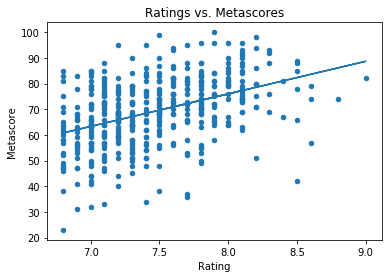

In [18]:
dfmovie = dfmovie.dropna()

x_vals = dfmovie["Rating"].values
m, b = np.polyfit(x_vals, dfmovie["Metascore"].values, deg = 1)

dfmovie.plot(x='Rating', y='Metascore', kind='scatter')
plt.plot(x_vals, m*x_vals + b)

plt.title("Ratings vs. Metascores")

plt.show()